In [6]:
import pandas as pd
import numpy as np
import seaborn as snss
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import preprocessing 


import warnings
warnings.filterwarnings('ignore')

In [47]:
data = pd.read_csv('C:\\Users\\BOOK\Documents\\DataScience_Project\\VLC-SGIT-25-014 - MODULE RESOURCE BUNDLE\\Module 1 - Finance\\Project 1 - Finance - Predictive Analytics\\Project 1 - Finance - Predictive Analytics\\Dataset\\loan.csv')

In [8]:
data.head()

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,Car Loan,16795,0.051852,15,Self-employed,Medium,833,Male,Single,Master,05-04-2018,23-04-2018,24-04-2018,14-08-2018,False
1,CUST-00004194,LN00002413,Personal Loan,1860,0.089296,56,Full-time,Medium,776,Female,Married,Bachelor,30-12-2022,31-12-2022,12-01-2023,05-04-2023,False
2,CUST-00003610,LN00000024,Personal Loan,77820,0.070470,51,Full-time,Low,697,Male,Divorced,High School,15-11-2019,18-11-2019,27-11-2019,24-02-2020,False
3,CUST-00001895,LN00001742,Car Loan,55886,0.062155,30,Full-time,Low,795,Female,Married,PhD,25-08-2021,08-09-2021,11-09-2021,25-02-2022,False
4,CUST-00003782,LN00003161,Home Loan,7265,0.070635,48,Part-time,Low,519,Female,Married,High School,02-09-2020,07-09-2020,11-09-2020,29-12-2020,False


In [9]:
data.tail(5)

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
4995,CUST-00002992,LN00001103,Car Loan,37945,0.070087,57,Self-employed,High,511,Male,Married,PhD,23-01-2022,11-02-2022,14-02-2022,13-06-2022,False
4996,CUST-00004094,LN00001068,Personal Loan,48937,0.056405,50,Part-time,Medium,502,Male,Single,PhD,12-05-2018,17-05-2018,27-05-2018,20-11-2018,False
4997,CUST-00003903,LN00000745,Home Loan,7476,0.064212,58,Full-time,High,452,Female,Single,High School,14-10-2022,29-10-2022,06-11-2022,08-04-2023,True
4998,CUST-00002276,LN00003075,Car Loan,52756,0.094914,12,Self-employed,Medium,728,Male,Married,PhD,21-07-2018,06-08-2018,20-08-2018,21-01-2019,False
4999,CUST-00003583,LN00002491,Personal Loan,91101,0.083821,52,Self-employed,Low,586,Male,Single,Master,03-08-2021,04-08-2021,07-08-2021,25-12-2021,False


In [10]:
data.columns

Index(['customer_id', 'loan_id', 'loan_type', 'loan_amount', 'interest_rate',
       'loan_term', 'employment_type', 'income_level', 'credit_score',
       'gender', 'marital_status', 'education_level', 'application_date',
       'approval_date', 'disbursement_date', 'due_date', 'default_status'],
      dtype='object')

In [257]:
data.shape

(5000, 17)

In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        5000 non-null   object 
 1   loan_id            5000 non-null   object 
 2   loan_type          5000 non-null   object 
 3   loan_amount        5000 non-null   int64  
 4   interest_rate      5000 non-null   float64
 5   loan_term          5000 non-null   int64  
 6   employment_type    5000 non-null   object 
 7   income_level       5000 non-null   object 
 8   credit_score       5000 non-null   int64  
 9   gender             5000 non-null   object 
 10  marital_status     5000 non-null   object 
 11  education_level    5000 non-null   object 
 12  application_date   5000 non-null   object 
 13  approval_date      5000 non-null   object 
 14  disbursement_date  5000 non-null   object 
 15  due_date           5000 non-null   object 
 16  default_status     5000 

In [17]:
data.dtypes

customer_id           object
loan_id               object
loan_type             object
loan_amount            int64
interest_rate        float64
loan_term              int64
employment_type       object
income_level          object
credit_score           int64
gender                object
marital_status        object
education_level       object
application_date      object
approval_date         object
disbursement_date     object
due_date              object
default_status          bool
dtype: object

In [ ]:
# data cleaning

In [259]:
data.isnull().any()

customer_id          False
loan_id              False
loan_type            False
loan_amount          False
interest_rate        False
loan_term            False
employment_type      False
income_level         False
credit_score         False
gender               False
marital_status       False
education_level      False
application_date     False
approval_date        False
disbursement_date    False
due_date             False
default_status       False
dtype: bool

In [260]:
data.isna().sum()*100/len(data)

customer_id          0.0
loan_id              0.0
loan_type            0.0
loan_amount          0.0
interest_rate        0.0
loan_term            0.0
employment_type      0.0
income_level         0.0
credit_score         0.0
gender               0.0
marital_status       0.0
education_level      0.0
application_date     0.0
approval_date        0.0
disbursement_date    0.0
due_date             0.0
default_status       0.0
dtype: float64

In [265]:
data.duplicated().sum()*100/len(data)

0.0

In [144]:
#missing value
#---Applying Only on variables with NaN values
for i in data.columns[data.isnull().any(axis=0)]:    
    data[i].fillna(data[i].mean(),inplace=True)


In [263]:
data['application_date']= pd.to_datetime(data['application_date'],dayfirst=True)
data['approval_date']= pd.to_datetime(data['approval_date'],dayfirst=True)
data['disbursement_date']= pd.to_datetime(data['disbursement_date'],dayfirst=True)
data['due_date']= pd.to_datetime(data['due_date'],dayfirst=True)

In [ ]:
# Exporatory Analysis

In [39]:
data.describe()

,loan_amount,interest_rate,loan_term,credit_score
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,49929.868000,0.079579,35.263000,573.206000
std,28721.249529,0.015230,13.792501,158.647522
min,1055.000000,0.031685,12.000000,300.000000
25%,24953.500000,0.069240,24.000000,435.000000
50%,49730.000000,0.079533,35.000000,571.000000
75%,75083.500000,0.089984,47.000000,712.000000
max,99989.000000,0.138894,59.000000,849.000000


In [271]:
pd.crosstab(data['credit_score'], data['default_status'],margins =True)

default_status,False,True,All
credit_score,,,
300,10,2,12
301,5,4,9
302,6,1,7
303,5,3,8
304,7,3,10
...,...,...,...
846,6,1,7
847,6,1,7
848,12,2,14


<Axes: xlabel='default_status', ylabel='loan_term'>

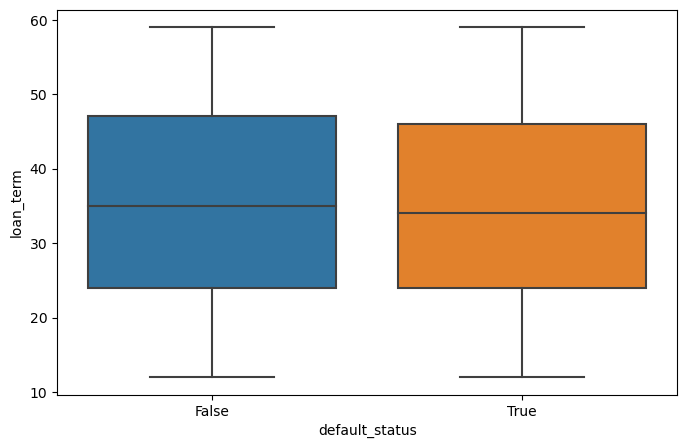

In [307]:
plt.rcParams['figure.figsize']=(8,5)
sns.boxplot(x="default_status", y="loan_term", data=data)

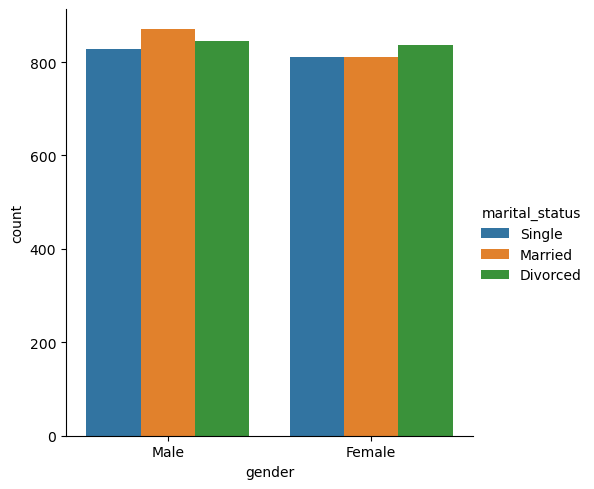

In [16]:
### Count the males/ females in the three classes

sns.catplot(x="gender", data=data, hue="marital_status", kind="count")
plt.show()  



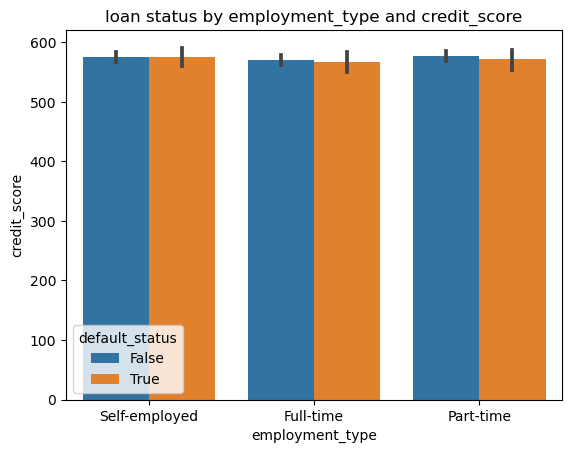

In [12]:
# Creating a grouped bar chart
sns.barplot(data=data, x='employment_type', y='credit_score', hue='default_status')
plt.title('loan status by employment_type and credit_score')
plt.show()

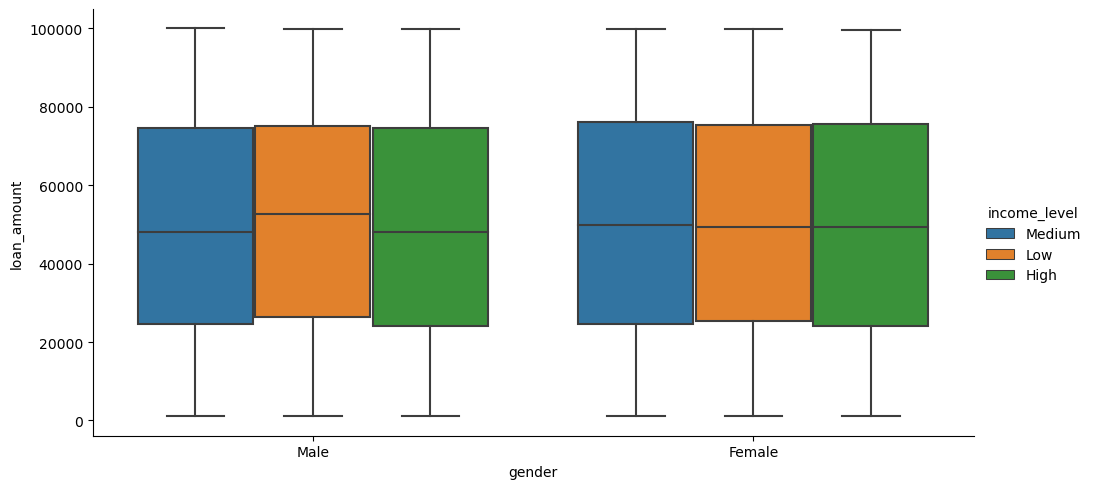

In [20]:
# gender by loan_amount (income_level)
sns.catplot(x="gender", y="loan_amount", hue="income_level", 
               data=data, aspect=2, kind="box")
plt.show()

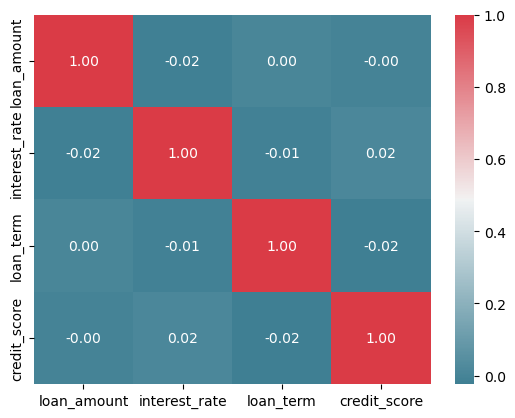

In [25]:
numeric_data = data.select_dtypes(include=['float64', 'int64']) # since our data has non numeric data as well

corr = numeric_data.corr() # Finding the correlation between different columns

#Generate Color Map, red & blue
colorsintheheatmap = sns.diverging_palette(220, 10, as_cmap=True)

#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colorsintheheatmap, annot=True, fmt=".2f")
plt.show()

In [14]:
datasubset = data.head(50)

Text(0.5, 0, 'credit_score')

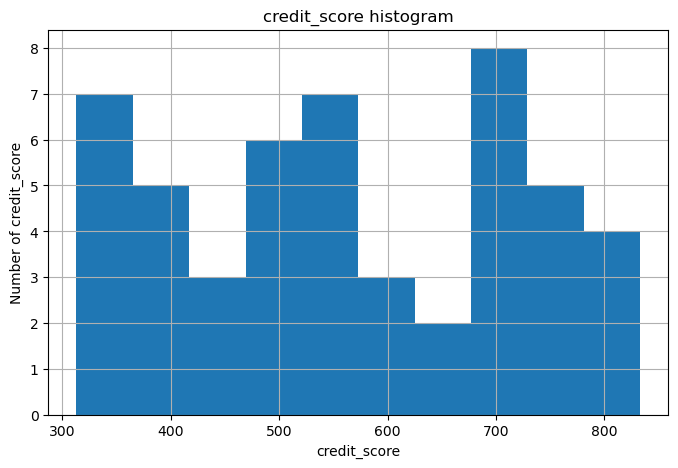

In [306]:
### Solution 5

datasubset['credit_score'].hist(bins=10)
plt.title("credit_score histogram")
plt.ylabel('Number of credit_score')
plt.xlabel('credit_score')

In [ ]:
# checking the column,s unique values

In [26]:
data['employment_type'].unique()

array(['Self-employed', 'Full-time', 'Part-time'], dtype=object)

In [27]:
data['income_level'].unique()

array(['Medium', 'Low', 'High'], dtype=object)

In [28]:
data['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [29]:
data['marital_status'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [30]:
data['education_level'].unique()

array(['Master', 'Bachelor', 'High School', 'PhD'], dtype=object)

In [31]:
data['default_status'].unique()

array([False,  True])

In [59]:
label_encoder = preprocessing.LabelEncoder() 
 
 # convert categorical columns to numerical values
 
 #Encode labels in column. 
#data['default_status']= label_encoder.fit_transform(data['default_status']) 
#data['income_level']= label_encoder.fit_transform(data['income_level']) 

data['employment_type']= label_encoder.fit_transform(data['employment_type']) 
data['marital_status']= label_encoder.fit_transform(data['marital_status']) 
data['education_level']= label_encoder.fit_transform(data['education_level']) 
data['gender']= label_encoder.fit_transform(data['gender']) 
data['loan_type']= label_encoder.fit_transform(data['loan_type']) 
   

In [60]:
data.replace({'income_level':{'Medium': 1, 'Low': 0, 'High': 2}},inplace=True)



In [142]:
data.head(3)

,customer_id,loan_id,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level,application_date,approval_date,disbursement_date,due_date,default_status
0,CUST-00004912,LN00004170,0,16795,0.051852,15,2,1,833,1,2,2,05-04-2018,23-04-2018,24-04-2018,14-08-2018,False
1,CUST-00004194,LN00002413,3,1860,0.089296,56,0,1,776,0,1,0,30-12-2022,31-12-2022,12-01-2023,05-04-2023,False
2,CUST-00003610,LN00000024,3,77820,0.070470,51,0,0,697,1,0,1,15-11-2019,18-11-2019,27-11-2019,24-02-2020,False


In [90]:
#  Prepare the data 

# Prepare the independent dataset (input)

# working with a few sample data from the main dataset

data_reduction = data.head(250)

x= data_reduction.drop(columns=['default_status','customer_id','loan_id',
                      'application_date','approval_date','disbursement_date','due_date'])
x.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level
0,0,16795,0.051852,15,2,1,833,1,2,2
1,3,1860,0.089296,56,0,1,776,0,1,0
2,3,77820,0.070470,51,0,0,697,1,0,1
3,0,55886,0.062155,30,0,0,795,0,1,3
4,2,7265,0.070635,48,1,0,519,0,1,1


In [91]:
x.columns

Index(['loan_type', 'loan_amount', 'interest_rate', 'loan_term',
       'employment_type', 'income_level', 'credit_score', 'gender',
       'marital_status', 'education_level'],
      dtype='object')

In [106]:
# Prepare the dependent dataset (output)

y=data_reduction['default_status']
y.head()

0    False
1    False
2    False
3    False
4    False
Name: default_status, dtype: bool

In [107]:
# Step 3 : Create the model

model=DecisionTreeClassifier()

In [109]:
# Step 4 : Split the model into test and training data 

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [110]:
# Step 5 : Train our model

model.fit(x_train,y_train)

DecisionTreeClassifier()

In [111]:
# X_train data 

x_train

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level
132,1,9110,0.088443,35,1,2,475,1,2,3
225,1,88455,0.105562,30,0,0,456,0,2,1
238,2,81623,0.113282,56,1,1,609,1,0,1
119,2,79603,0.081853,51,2,1,602,1,1,2
136,1,83948,0.074973,20,1,1,706,0,0,3
...,...,...,...,...,...,...,...,...,...,...
106,2,40504,0.082173,25,1,1,570,0,2,3
14,0,1769,0.088982,14,0,1,550,0,0,3
92,3,40099,0.079410,31,2,1,810,1,0,0
179,3,31080,0.087192,19,2,2,371,0,0,3


In [169]:
# y_train data 

y_train

132    False
225    False
238    False
119     True
136    False
       ...  
106    False
14     False
92     False
179    False
102    False
Name: default_status, Length: 200, dtype: bool

In [112]:
# Step 6 : Make predictions

predictions=model.predict(x_test)

In [113]:
# Predicted output

predictions

array([False, False,  True, False, False,  True,  True, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False,  True, False, False, False,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False])

In [114]:
# Step 7 : Evaluate the model

prediction_accuracy=accuracy_score(y_test,predictions)
prediction_accuracy

0.62

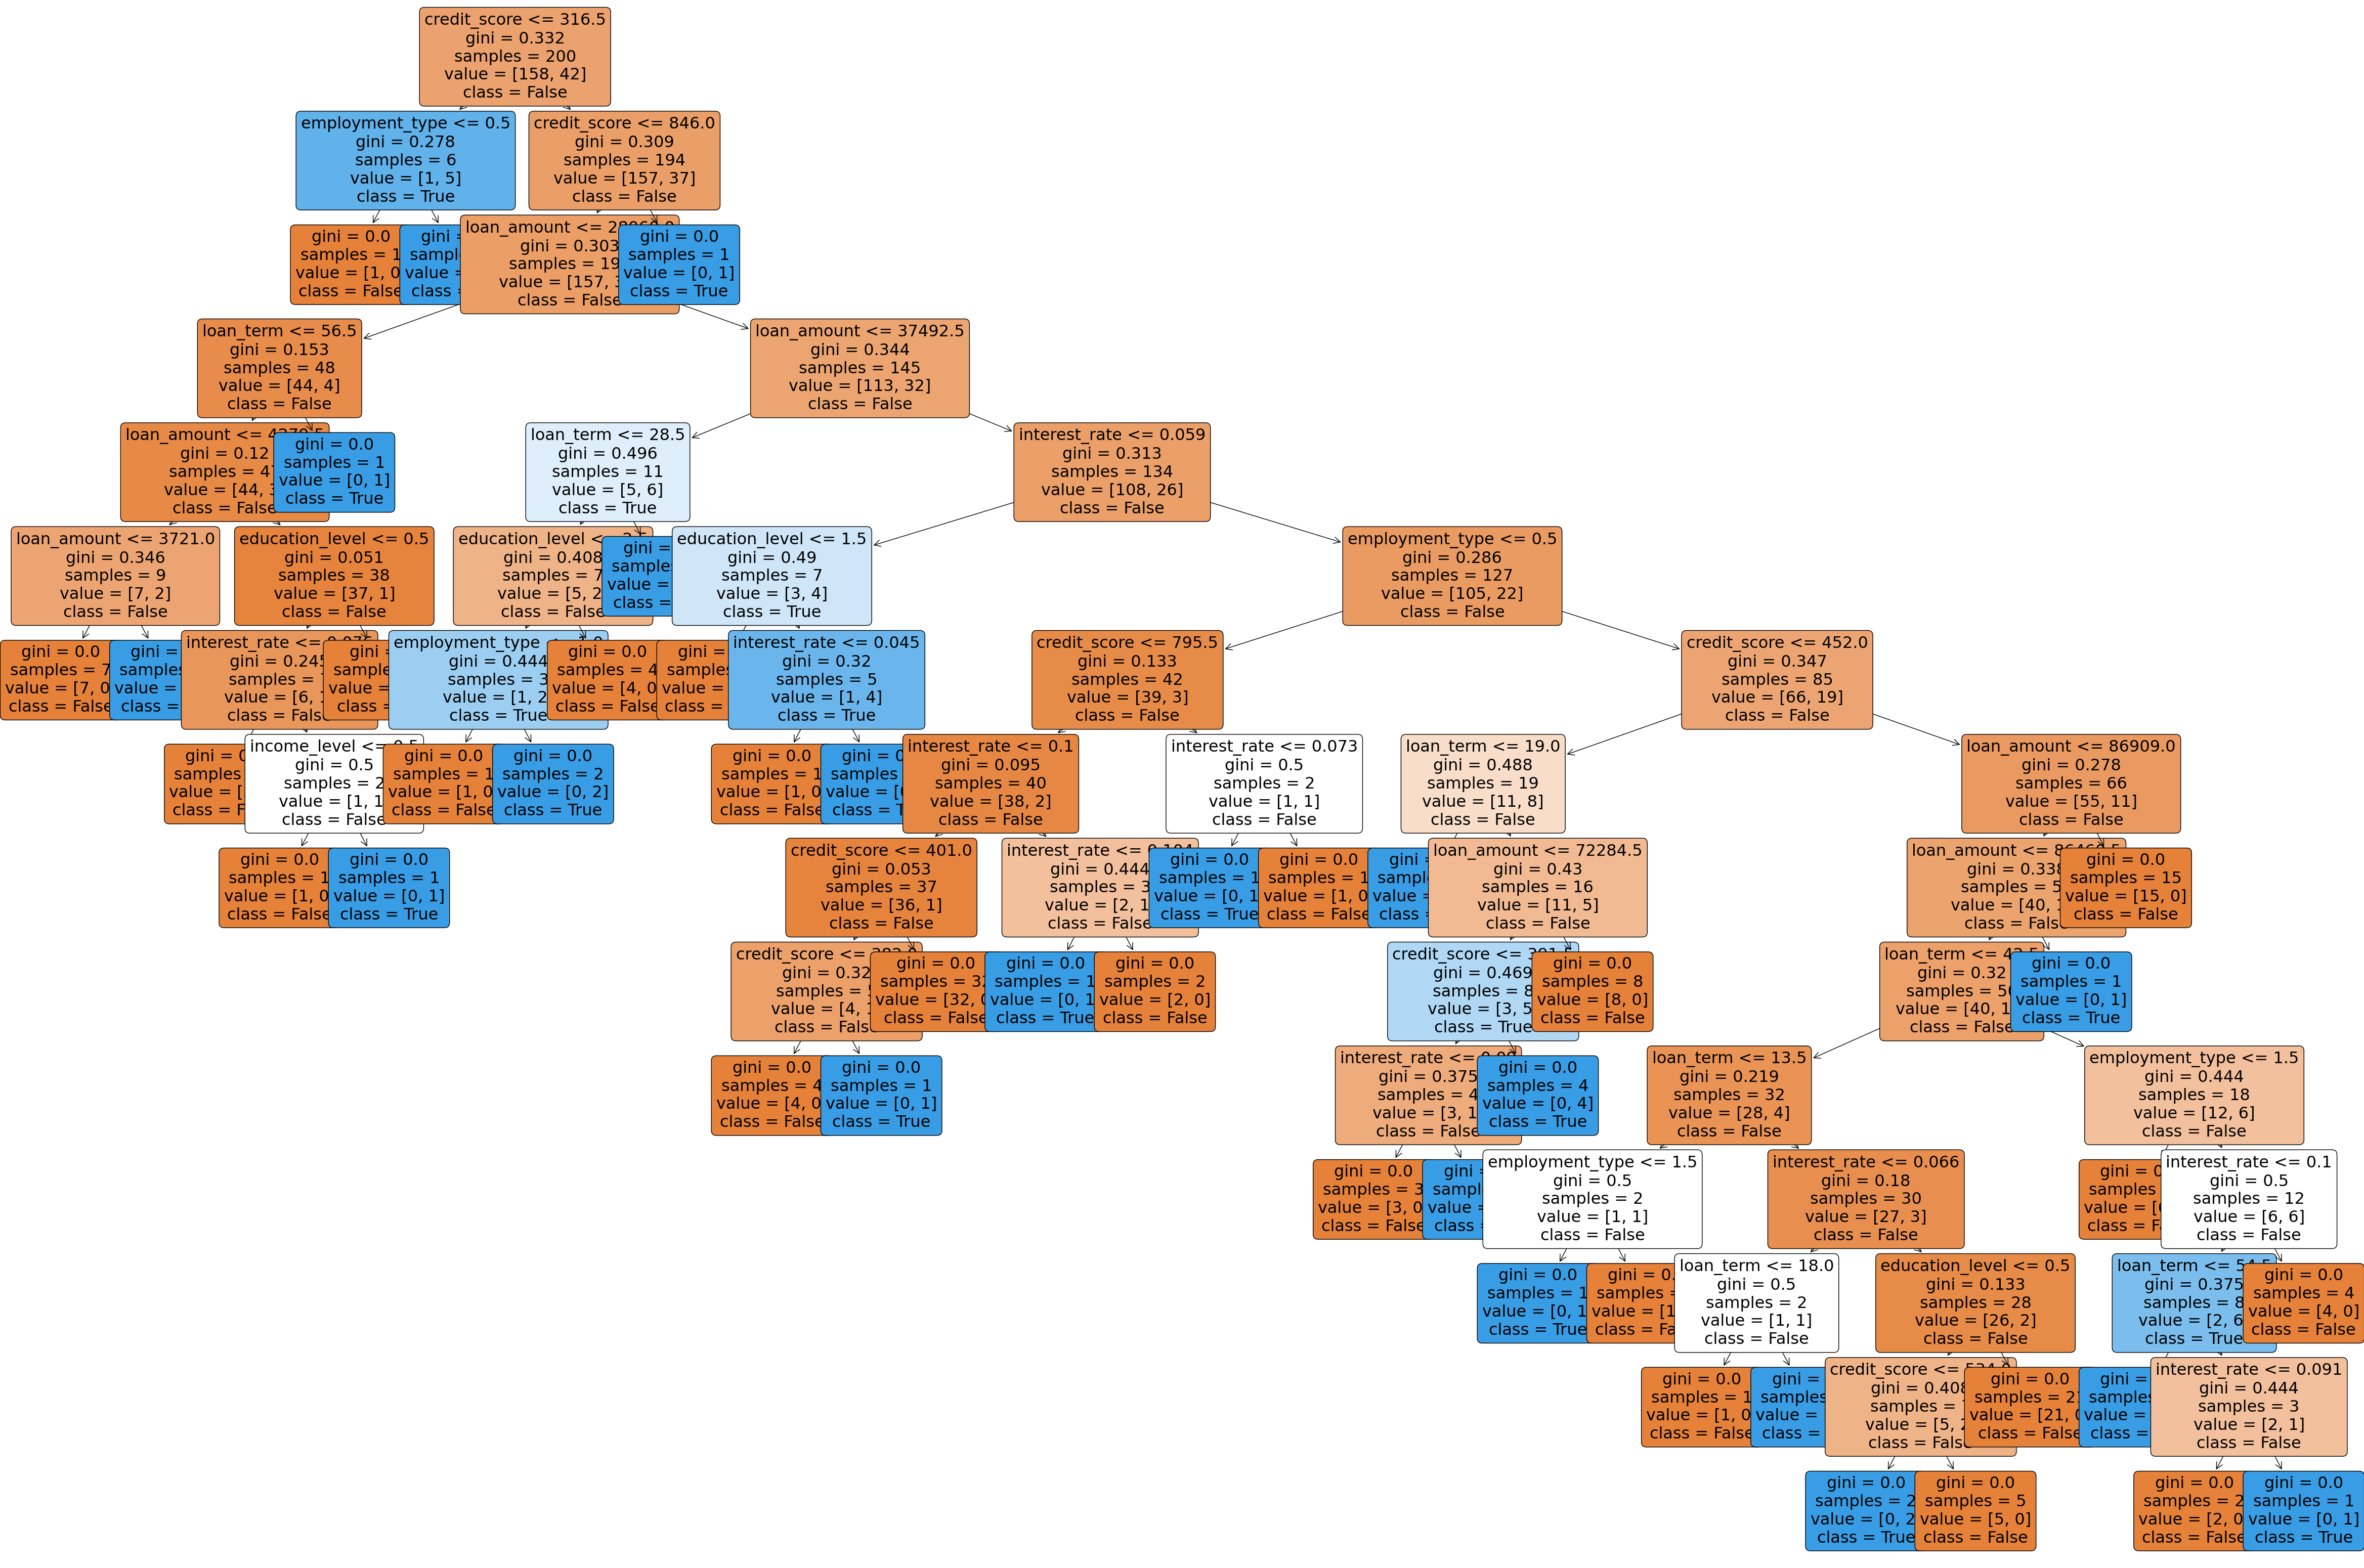

In [115]:
plt.figure(figsize=(60,40))
dtree_plot = tree.plot_tree(model,
        feature_names  = ['loan_type', 'loan_amount', 'interest_rate', 'loan_term',
       'employment_type', 'income_level', 'credit_score', 'gender',
       'marital_status', 'education_level'],
        class_names = np.array(sorted(y.unique())).astype('str').tolist(), label="all", rounded=True,
                    
        filled = True,fontsize = 23)
plt.show()


In [ ]:
# Here Am working with the full Dataset of this Project


In [49]:
data.shape

(5000, 17)

In [53]:


xs= data.drop(columns=['default_status','customer_id','loan_id',
                      'application_date','approval_date','disbursement_date','due_date'])
xs.head()

,loan_type,loan_amount,interest_rate,loan_term,employment_type,income_level,credit_score,gender,marital_status,education_level
0,0,16795,0.051852,15,2,1,833,1,2,2
1,3,1860,0.089296,56,0,1,776,0,1,0
2,3,77820,0.070470,51,0,0,697,1,0,1
3,0,55886,0.062155,30,0,0,795,0,1,3
4,2,7265,0.070635,48,1,0,519,0,1,1


In [54]:
ys=data['default_status']
ys.head()

0    False
1    False
2    False
3    False
4    False
Name: default_status, dtype: bool

In [55]:
models=DecisionTreeClassifier()

In [56]:
xs_train, xs_test, ys_train, ys_test = train_test_split(xs,ys,test_size=0.2,random_state=42)

In [57]:
models.fit(xs_train,ys_train)

DecisionTreeClassifier()

In [67]:
pred=models.predict(xs_test)

In [ ]:
pred

In [65]:
pred_accuracy=accuracy_score(ys_test,pred)
pred_accuracy

0.654

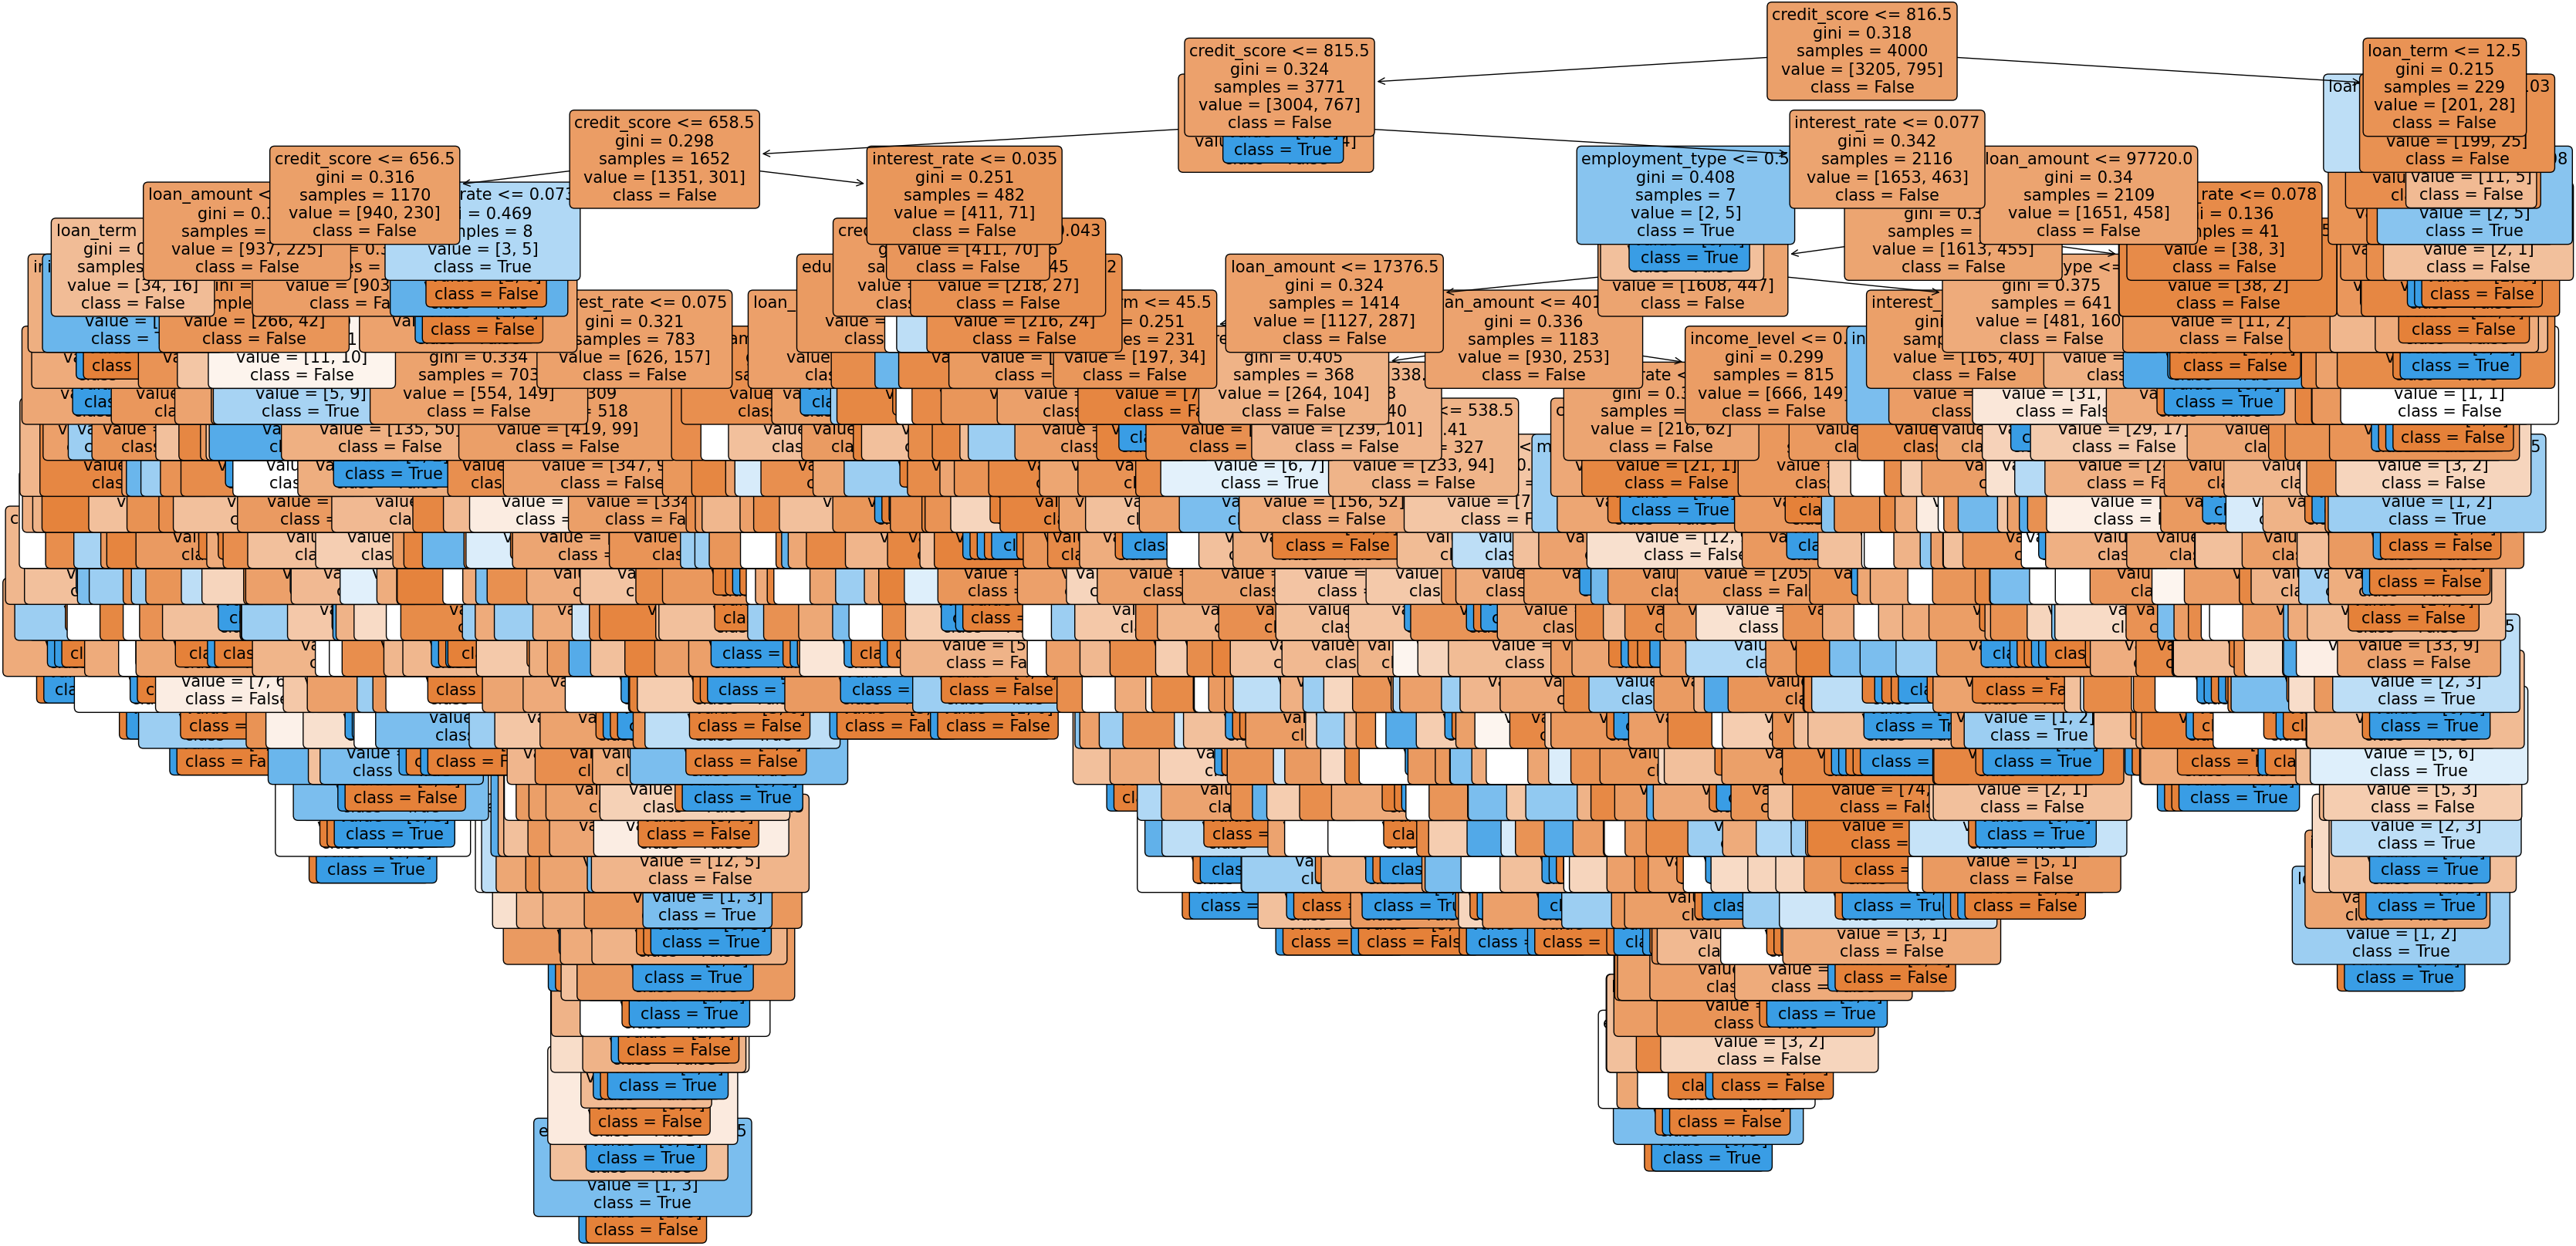

In [79]:
plt.figure(figsize=(40,20))
dtree_plot = tree.plot_tree(models,
        feature_names  = ['loan_type', 'loan_amount', 'interest_rate', 'loan_term',
       'employment_type', 'income_level', 'credit_score', 'gender',
       'marital_status', 'education_level'],
        class_names = np.array(sorted(ys.unique())).astype('str').tolist(), label="all", rounded=True,
                    
        filled = True,fontsize = 15)
plt.show()
